# Probability Plotting

Probability plotting is a method of estimating, the old fashioned way (paper and pencil) the parameters of an assumed distribution.

The Surpyval module uses the least squares onto the probability plot (except for the Gamma distribution) for the 'MPP' method.

Although on most occassions it is sensible to use the Maximum Likelihood Estimate, it is prudent to check that your fitted model resembles your data. The plot function of the parametric distribution does exctly that. It plots the transformed non parametric CDF with the line of best fit for that model over the top. This allows you to do a quick sense check on the fit. Demonstrated in this notebook is some of the results you can achieve with the Surpyval module.

In [1]:
import sys
print(sys.version)

3.9.1 (default, May 19 2021, 19:16:59) 
[Clang 12.0.5 (clang-1205.0.22.9)]


In [3]:
import surpyval as surv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dist = surv.parametric.LogLogistic
x = dist.random(10, 3, .9)

model = dist.fit(x, how='MLE')
print(model)
# model.plot(heuristic='Nelson-Aalen', plot_bounds=True);

Parametric Surpyval model with LogLogistic distribution fitted by MLE yielding parameters (4.7672108728725835, 0.9275411786014616)


Autodifferentiation with hessian failed, trying without hessian


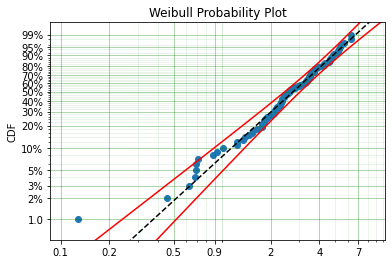

In [5]:
dist = surv.parametric.Weibull
x = dist.random(100, 3, 2)

model = dist.fit(x, how='MLE', offset=False)
# print(model)
model.plot();

Parametric Surpyval model with LogLogistic distribution fitted by MPP yielding parameters (3.9585656216202687, 1.062970395770956)


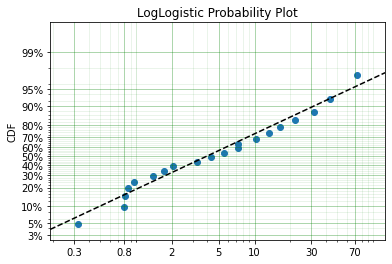

In [7]:
dist = surv.parametric.LogLogistic
x = dist.random(20, 3, .9)

model = dist.fit(x, how='MPP')
print(model)
model.plot(heuristic='Nelson-Aalen', plot_bounds=True);

Offset Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (7.14192521570687, 2.620452403830307) with offset of 39.765629629050665


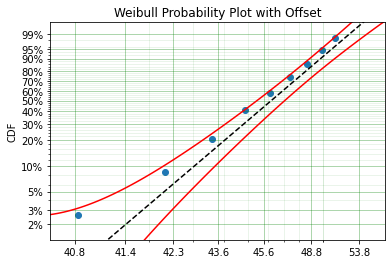

In [14]:
from surpyval import Weibull
from surpyval.datasets import BoforsSteel

df = BoforsSteel.df

x = df['x']
n = df['n']
np.seterr(all='ignore')

model = Weibull.fit(x=x, n=n, how='MLE', offset=True)#, init=[35., 12., 1.])

print(model)
model.plot()
plt.savefig('weibull_plot.png')

Offset Parametric Surpyval model with Weibull distribution fitted by MPS yielding parameters (10.845057767618673, 2.3251186148025225) with offset of 10.0


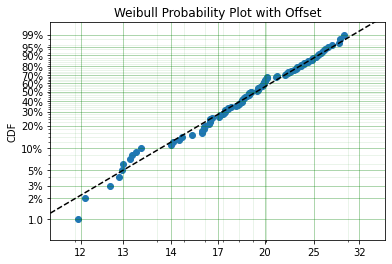

In [15]:
N = 100
dist = surv.ExpoWeibull
x = dist.random(N, 10., 2., 1.3) + 10
model = surv.Weibull.fit(x, how='MPS', heuristic="Nelson-Aalen", offset=True, fixed={'gamma' : 10.})
print(model)
model.plot(plot_bounds=True);

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (2.939886526344016, 2.960984592607459)


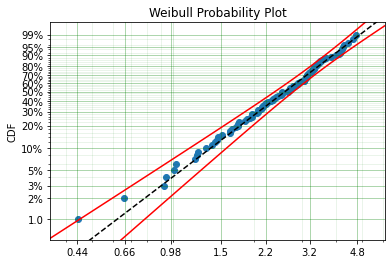

In [9]:
dist = surv.Weibull
x = dist.random(100, 3, 3.)
model = dist.fit(x, how='MLE')
model.plot();
print(model)

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (6.621806339893803, 3.1443591669878064)


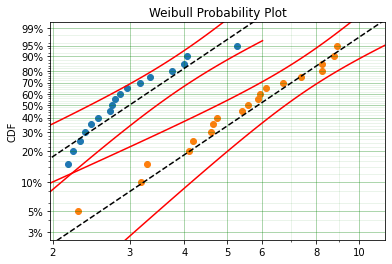

In [10]:
dist = surv.Weibull
x = dist.random(20, 3, 3.)
x2 = dist.random(20, 7, 3.)
model = dist.fit(x, how='MLE')
model.plot();
model2 = dist.fit(x2, how='MLE')
model2.plot();
print(model2)

Parametric Surpyval model with ExpoWeibull distribution fitted by MLE yielding parameters (5.086353503774147, 4.967968929048619, 1.8141741754228051)


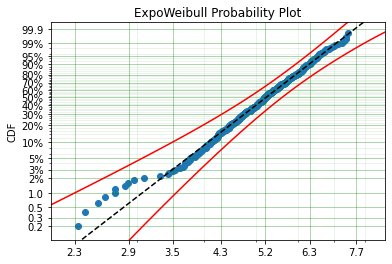

In [22]:
x = surv.ExpoWeibull.random(500, 5, 5., 2.)

model = surv.ExpoWeibull.fit(x, how='MLE')
model.plot();
print(model)

Offset Parametric Surpyval model with Weibull distribution fitted by MPS yielding parameters (9.026358805235764, 2.298360274610915) with offset of 38.444858206981316


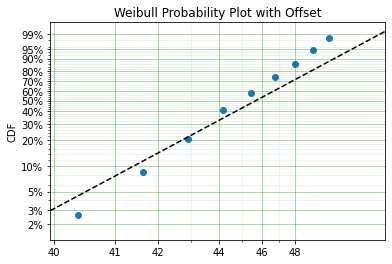

In [23]:
df = surv.datasets.BoforsSteel.df
dist = surv.Weibull

model = dist.fit_from_df(df, how='MPS', offset=True)
print(model)
model.plot(plot_bounds=True);

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (1003.6877561536224, 9.525218800270677)


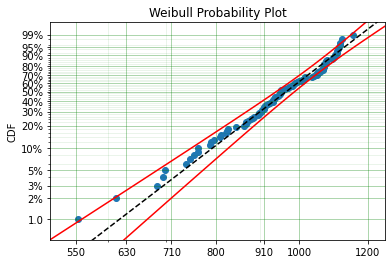

In [24]:
x = surv.Weibull.random(100, 1000, 10)

model = surv.Weibull.fit(x, how='MLE')
model.plot(plot_bounds=True)
print(model)

Parametric Surpyval model with Beta distribution fitted by MLE yielding parameters (4.0, 0.43634809406549735)


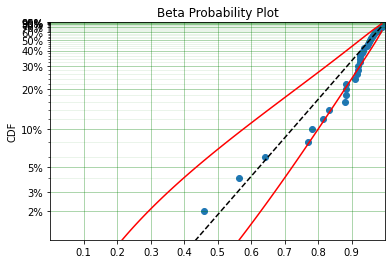

In [12]:
x = surv.Beta.random(50, 4, .5)
model = surv.Beta.fit(x, how='MLE', fixed={'alpha' : 4.}) 
print(model)

model.plot(plot_bounds=True)

In [13]:
x = surv.Gamma.random(20, 5., 2)
surv.Gamma.fit(x, how='MLE', fixed={'alpha' : 7.}).params

(7.0, 2.8374119681936603)

Offset Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (7.972491100948362, 2.9640882963629553) with offset of 39.0


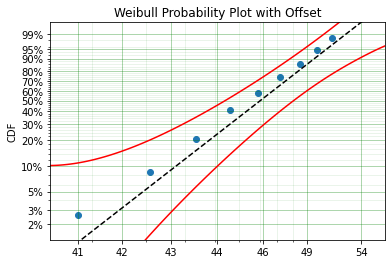

In [14]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# n = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.
dist = surv.Weibull
model = dist.fit(x, c=c, n=n, how='MLE', offset=True, fixed={'gamma' : 39.})
# model = dist.fit(x, c=c, n=n, how='MLE')
print(model)
model.plot(plot_bounds=True);

(46.9187932128571, 21.708479231520922)

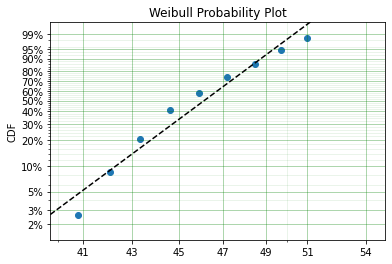

In [15]:
model_fixed = surv.Weibull.fit(x, c=c, n=n, how='MPP', fixed={'alpha' : 41.})
model_fixed.plot()
model_fixed.params

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (47.40028054095793, 18.0)


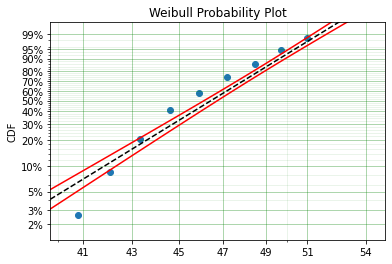

In [16]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.

weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE', fixed={'beta' : 18.})
# weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE')
weib_3p.plot(plot_bounds=True);
print(weib_3p)

In [17]:
x = [2, 2, 2, 5, 6, [4, 6], [3, 4], [1, np.inf]]
c = [0, 1, -1, -1, 1, 2,      2,       2]
n = [10, 1, 1, 1, 1, 2, 1, 1]

Turnbull survival model


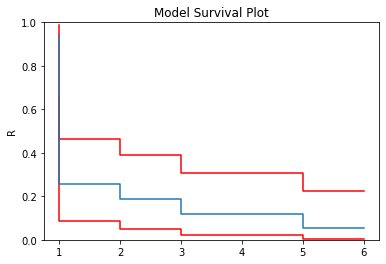

In [18]:
# model = surv.Weibull.fit(x, c, n, 'MLE', fixed={'alpha' : 3.})
np_model = surv.Turnbull.fit(x, c, n)
# model.plot('Turnbull')
print(np_model)
np_model.plot()

In [7]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 4, 5, 6, 7, 8]
c = None
n = None

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (5.774600409714828, 2.4790941281800585)


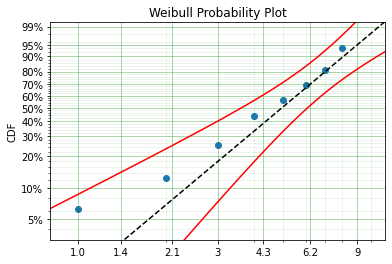

In [8]:
model = surv.Weibull.fit(x, c, n)
np_model = surv.Turnbull.fit(x, c, n)
model.plot()
print(model)

/Users/derrynknife/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: divide by zero encountered in log
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/derrynknife/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: invalid value encountered in true_divide
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/derrynknife/Projects/surpyval/surpyval/nonparametric/nonparametric.py:75: RuntimeWarning: divide by zero encountered in log
  R_out = np.log(-np.log(self.R)) - stat * np.sqrt(R_out)


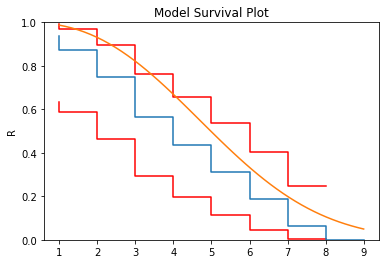

In [9]:
np_model.plot()
xx = np.linspace(1, 9)
plt.plot(xx, model.sf(xx))

Parametric Surpyval model with ExpoWeibull distribution fitted by MLE yielding parameters (0.2414429829389837, 1.0921538277474552, 4.640817858781089)


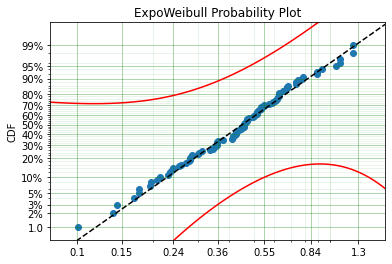

In [25]:
x = surv.Gamma.random(100, 5, 10)

model = surv.ExpoWeibull.fit(x, how='MLE', rr='x')
model.plot()
print(model)

Offset Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (8.819075378766046, 1.3555807590738547) with offset of 1.6635141854529794


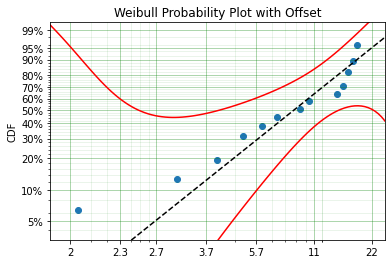

In [23]:
x = [2, 3, 4, 5, 5, 6, 7, 9, 10, 14, 15, 16, 16, 17, 18]
model = surv.Weibull.fit(x, offset=True)
model.plot('Nelson-Aalen', plot_bounds=True);
print(model)

(6.002491257382044, 3.33996585195266)

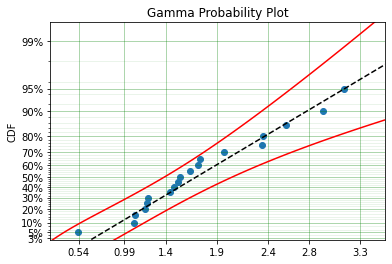

In [51]:
dist = surv.Gamma
x = [2, 3, 4, 5, 5, 6, 7, 8, 10, 14, 15, 16, 16, 17, 17, 18]
x = surv.Gamma.random(20, 4, 2)
model = dist.fit(x, how='MLE')
model.plot(heuristic='Turnbull', plot_bounds=True);
model.params

Using a ball bearing failure time data set from Lieblein and Zelen (1956). Can be found [here](https://nvlpubs.nist.gov/nistpubs/jres/057/5/V57.N05.A04.pdf)

(81.87455872411901, 2.1018468637689014)

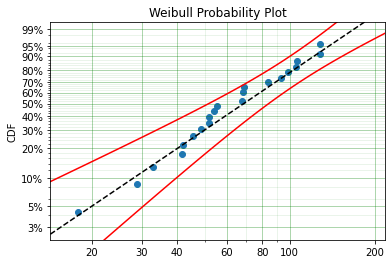

In [26]:
x = [17.88, 28.92, 33, 41.52, 42.12, 45.6, 48.4, 51.84, 
     51.96, 54.12, 55.56, 67.8, 68.64, 68.64, 68.88, 84.12, 
     93.12, 98.64, 105.12, 105.84, 127.92, 128.04, 173.4]
model = surv.Weibull.fit(x)
model.plot()
plt.savefig('weibull_plot.png')
model.params

Using data from the man the distribution is named after! Weibull uses data on the tensile strength of bofors steel. Data can be accessed [here](https://pdfs.semanticscholar.org/88c3/7770028e7ed61180a34d6a837a9a4db3b264.pdf)

(80.44291064436256, 2.0821807324298174)

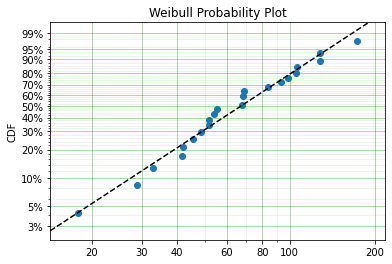

In [27]:
weib_3p = surv.Weibull.fit(x, n=None, how='MPP', rr='y', heuristic='Nelson-Aalen')
weib_3p.plot(heuristic='Nelson-Aalen', plot_bounds=False);
weib_3p.params

(90.53199853260337, 1.9833219850211155)
Offset Parametric Surpyval model with Weibull distribution fitted by MPP yielding parameters (90.53199853260337, 1.9833219850211155) with offset of 18.504119575524054


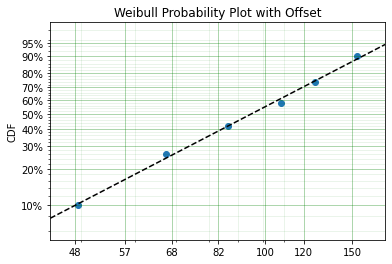

In [36]:
x = np.array([48, 66, 85, 107, 125, 152])
weib_3p = surv.Weibull.fit(x, how='MPP', heuristic='Blom', offset=True)
print(weib_3p.params)
weib_3p.plot(heuristic='Blom', plot_bounds=False);
print(weib_3p)

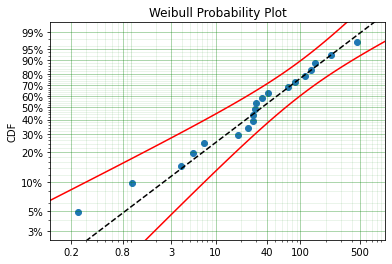

In [37]:
x = surv.Weibull.random(20, 50, 0.8)

model = surv.parametric.Weibull.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

We might also have a scenario where the reliability could be best modelled as a mixture of two Weibull distributions.

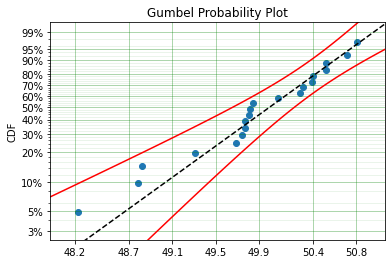

In [6]:
x = surv.Gumbel.random(20, 50, 0.6)

model = surv.parametric.Gumbel.fit(x, how='MLE')
model.plot(heuristic='Fleming-Harrington');

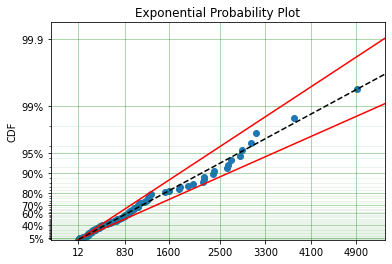

In [28]:
dist = surv.Exponential
x = dist.random(100, 1e-3)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

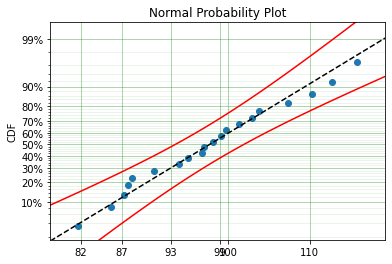

In [29]:
dist = surv.Normal
x = dist.random(20, 100, 10)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Filliben');

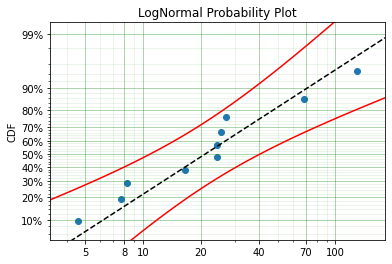

In [30]:
dist = surv.LogNormal
x = dist.random(10, 3, 0.8)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', cb=0.05);

Autograd attempt failed, using without hessian
Parametric Surpyval model with Uniform distribution fitted by MPS yielding parameters (0.8889450431625073, 20.071094766032815)


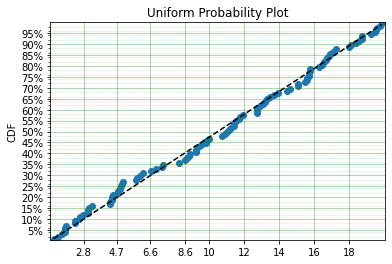

In [12]:
dist = surv.Uniform
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MPS')
model.plot(heuristic='Fleming-Harrington', plot_bounds=False);
print(model)

(-3.2912458727164995, 19.44756337976485)

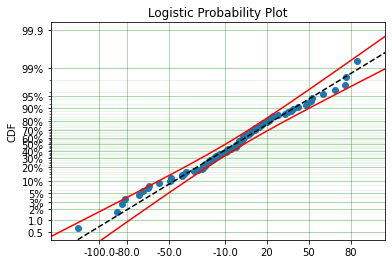

In [17]:
dist = surv.parametric.Logistic
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Blom', plot_bounds=True);
model.params

In [11]:
dist = surv.parametric.LogLogistic
x = dist.random(20, 3, .9)

model = dist.fit(x, how='MPS')
print(model)
# model.plot(heuristic='Nelson-Aalen', plot_bounds=True);

/Users/derrynknife/Projects/surpyval/surpyval/parametric/fitters/mps.py:60: UserWarning: Autodifferentiation with hessian failed, trying without hessian
  warnings.warn("Autodifferentiation with hessian failed, trying without hessian")


Exception: Likelihood function appears undefined; try alternate estimation method